In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [24]:
df = pd.read_csv("Hotel Reservations.csv")
df.shape

(36275, 19)

In [25]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [26]:
df1 = df.drop(['Booking_ID'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [27]:
df1.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [28]:
df1.booking_status.replace(to_replace=['Not_Canceled','Canceled'],value=[1,0],inplace=True)
df1.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [29]:
df1.isnull().values.any()

False

In [30]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 15 numerical variables

The numerical variables : ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [31]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 3 categorical variables

The categorical variables : ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


array([[<AxesSubplot: title={'center': 'no_of_adults'}>,
        <AxesSubplot: title={'center': 'no_of_children'}>,
        <AxesSubplot: title={'center': 'no_of_weekend_nights'}>,
        <AxesSubplot: title={'center': 'no_of_week_nights'}>],
       [<AxesSubplot: title={'center': 'required_car_parking_space'}>,
        <AxesSubplot: title={'center': 'lead_time'}>,
        <AxesSubplot: title={'center': 'arrival_year'}>,
        <AxesSubplot: title={'center': 'arrival_month'}>],
       [<AxesSubplot: title={'center': 'arrival_date'}>,
        <AxesSubplot: title={'center': 'repeated_guest'}>,
        <AxesSubplot: title={'center': 'no_of_previous_cancellations'}>,
        <AxesSubplot: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<AxesSubplot: title={'center': 'avg_price_per_room'}>,
        <AxesSubplot: title={'center': 'no_of_special_requests'}>,
        <AxesSubplot: title={'center': 'booking_status'}>,
        <AxesSubplot: >]], dtype=object)

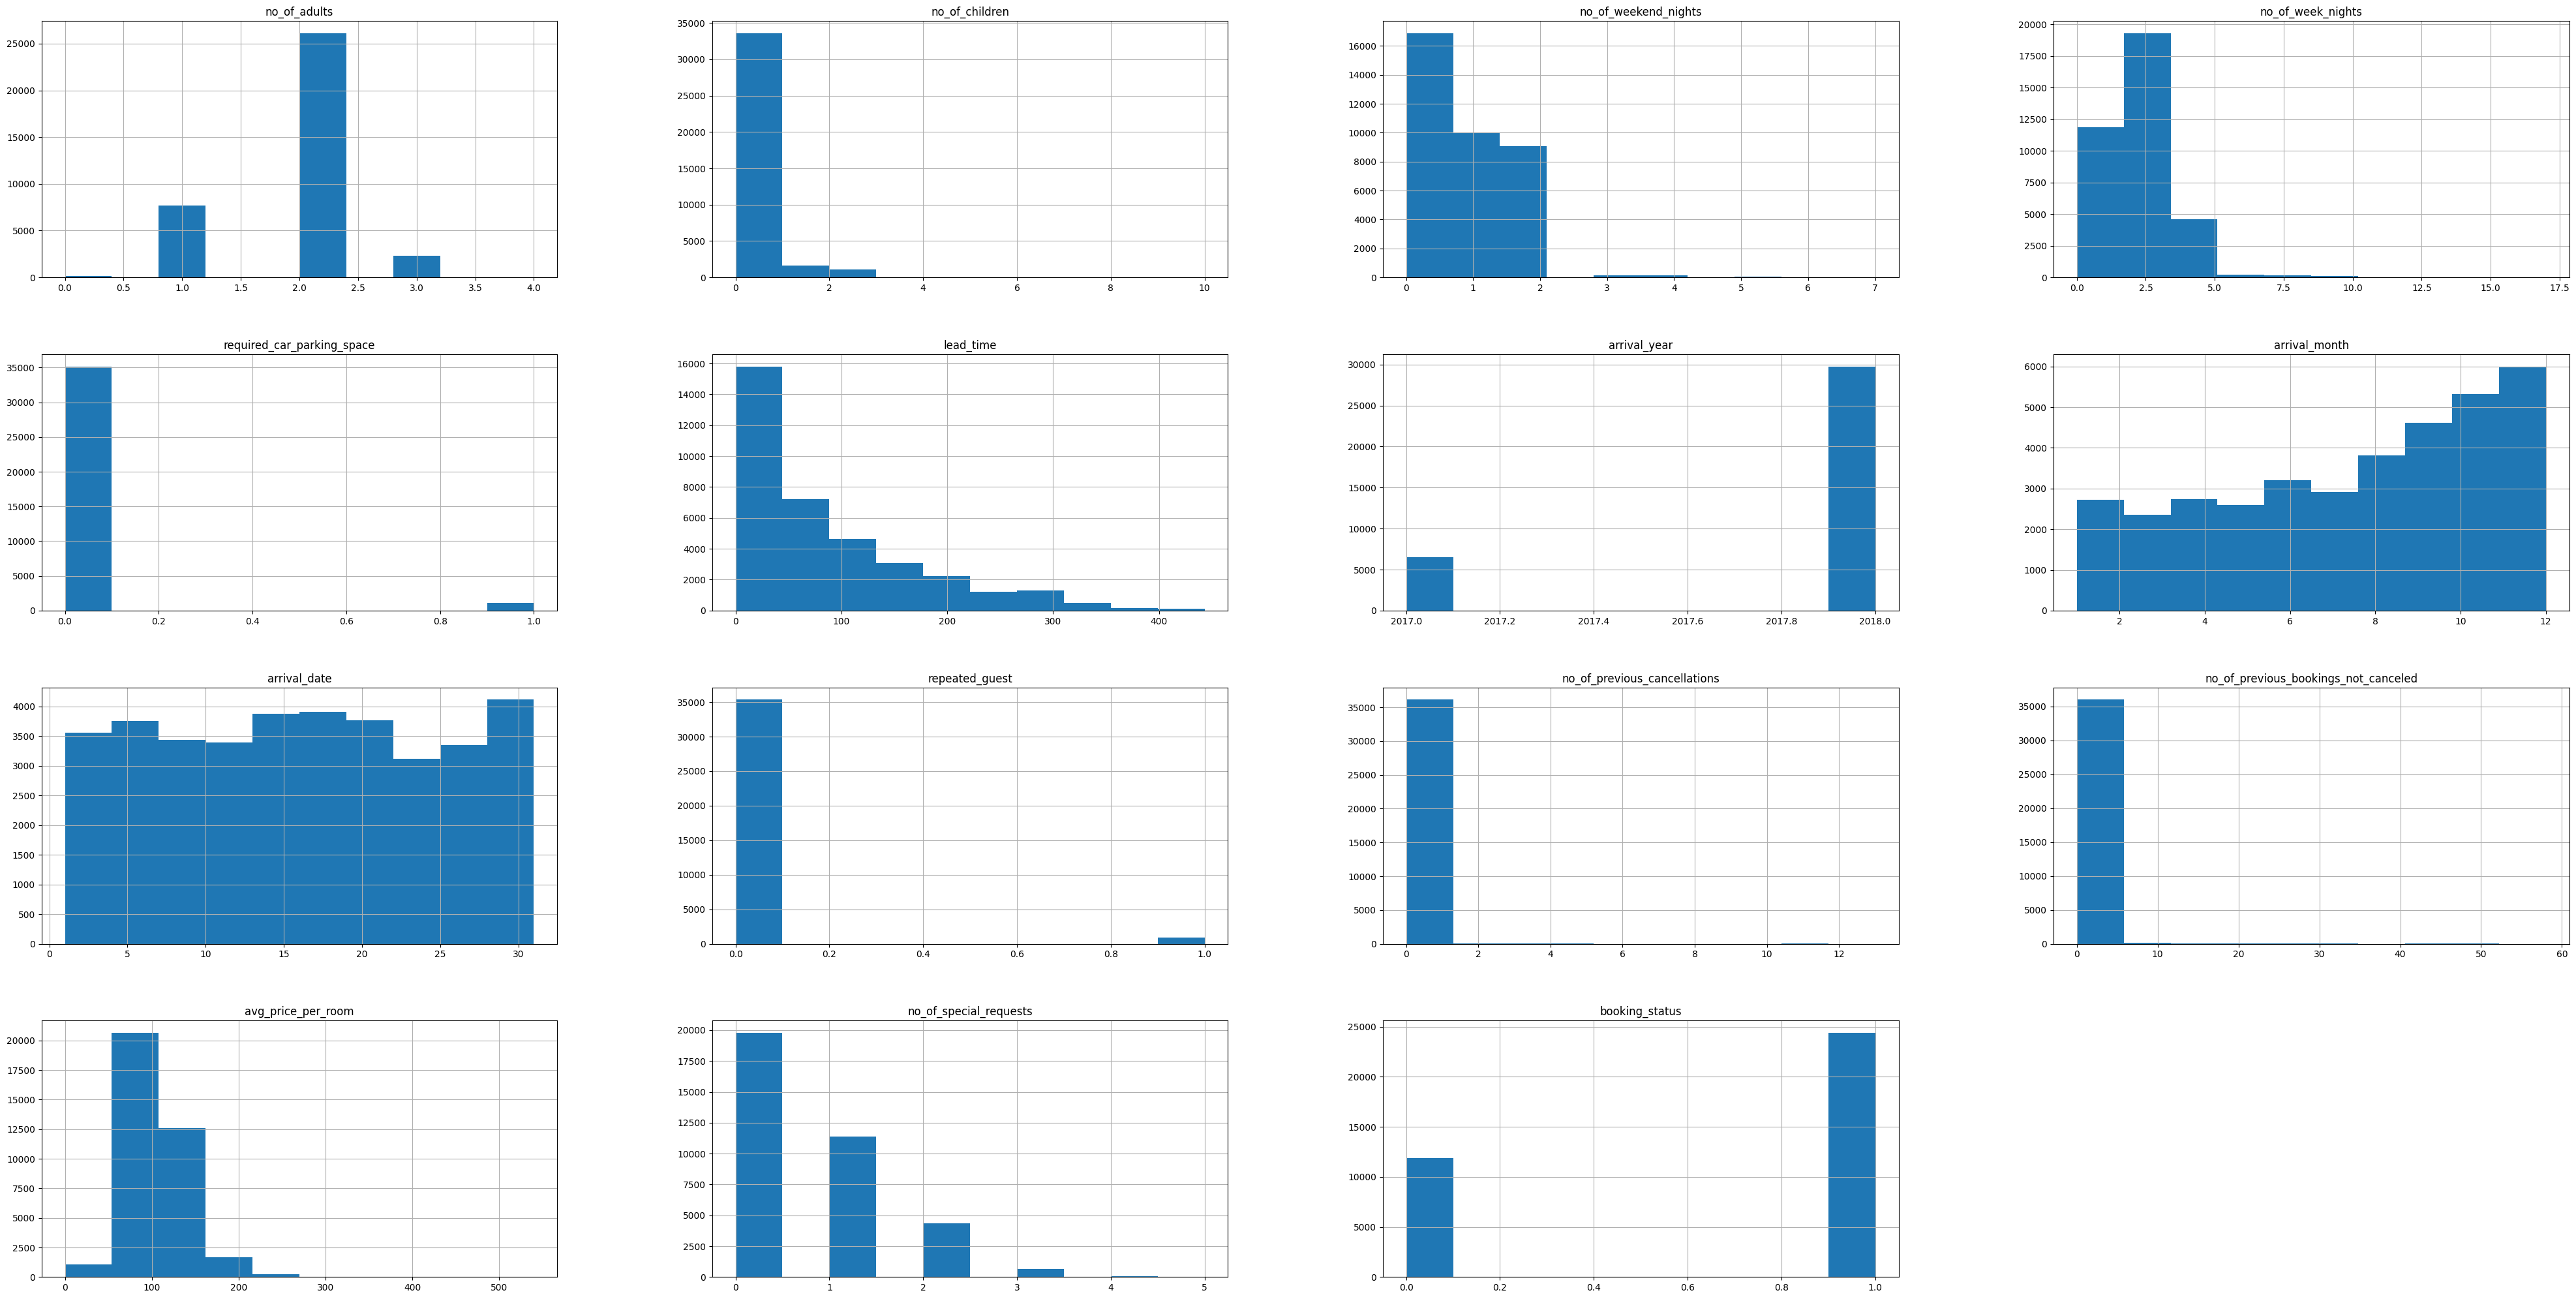

In [32]:
df1[numerical].hist(figsize=(50,25))

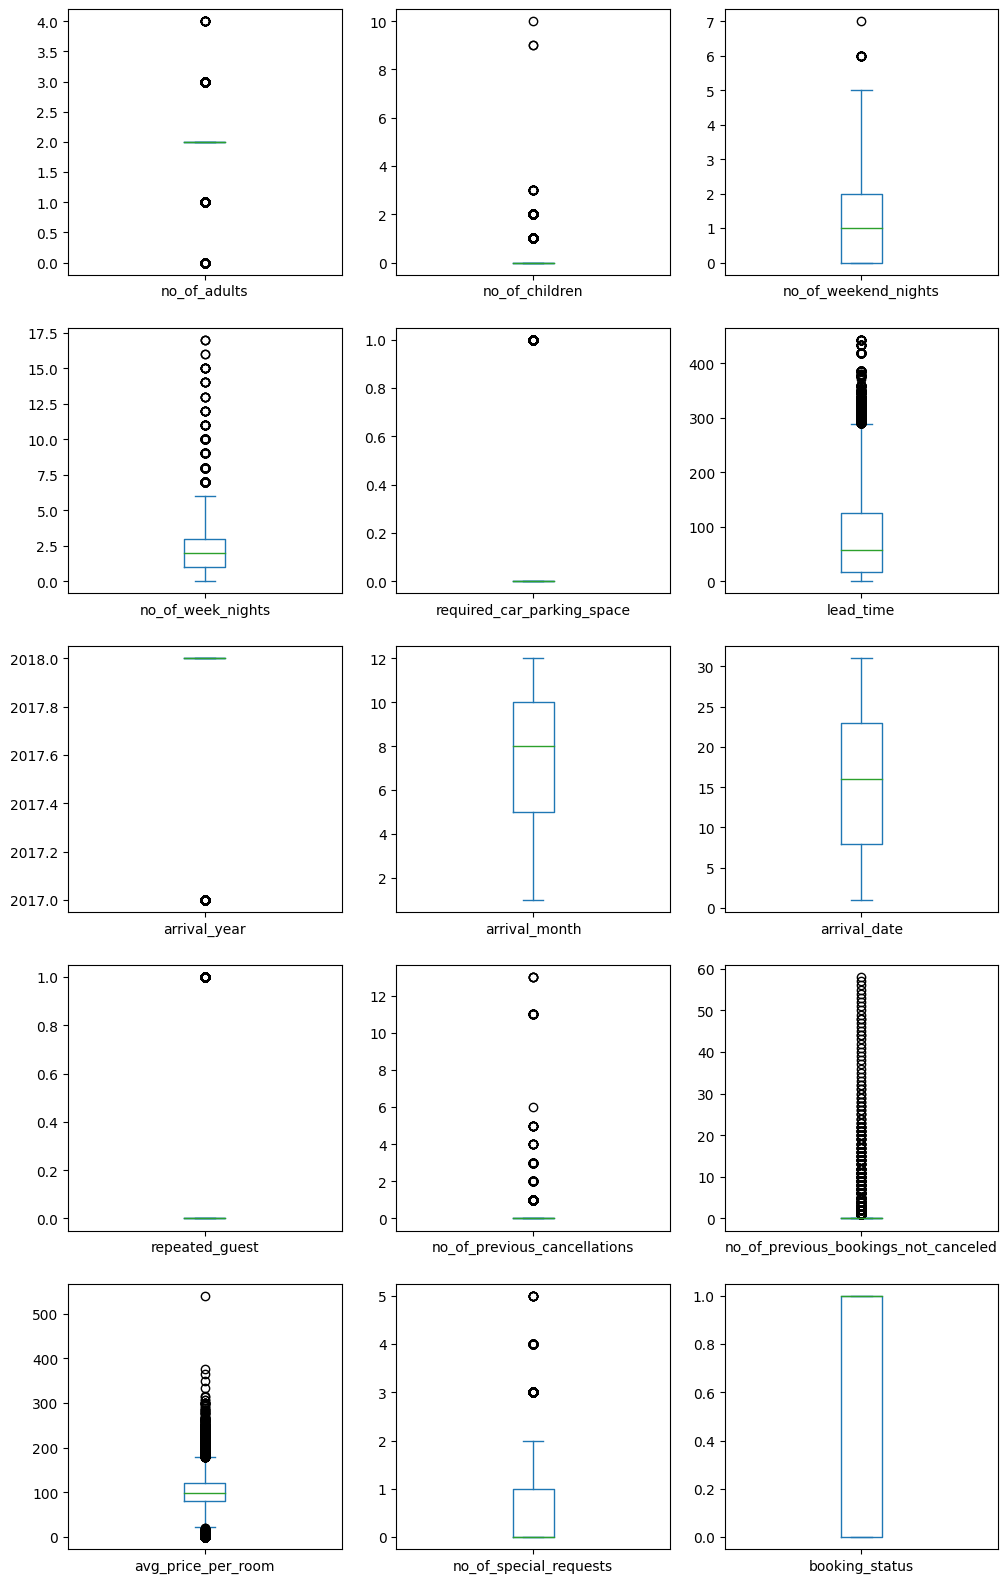

In [33]:
df1[numerical].plot(kind = "box",subplots = True,layout = (5,3),figsize=(12,20)) #Boxplot to check the outliers
plt.show()

In [34]:
df1.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               1  
1                       1               1  
2                       0               0  
3                       0               0  
4                       0               0

In [36]:
df2 = pd.get_dummies(data=df1, columns=categorical,drop_first=True)
df1.shape, df2.shape

((36275, 18), (36275, 28))

Feature Engineering

In [37]:
X = df2.drop(['booking_status'],axis=1)
y = df2.booking_status

X.shape, y.shape

((36275, 27), (36275,))

In [38]:
y.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

smote because there is huge imbalance

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [41]:
y.value_counts()

1    24390
0    24390
Name: booking_status, dtype: int64

In [42]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39024, 27), (9756, 27), (39024,), (9756,))

In [43]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [44]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [45]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.8015
Test set score: 0.7957


In [46]:
y_pred = logreg.predict(X_test_RF)

In [47]:
log_accuracy = logreg.score(X_test_RF, y_test)
log_accuracy

0.7957154571545716

In [48]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

0.7943160907789818

In [49]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

0.7974137931034483

KNN

In [50]:
from math import sqrt
print(sqrt(X_train.shape[1]))

5.196152422706632


In [51]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

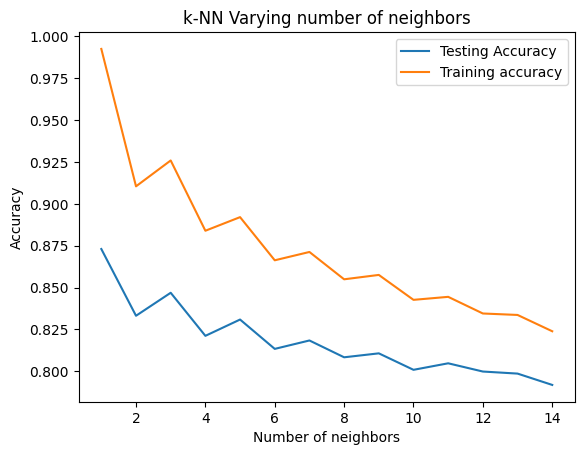

In [52]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 9 candidates, totalling 54 fits
Best Score:0.8653649036490366
Best Parameters: {'n_neighbors': 1}


In [54]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.9925
Test set score: 0.8730


In [55]:
y_pred = knn_cv.predict(X_test)

In [56]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.8730012300123001

In [57]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

0.9081105369579869

In [58]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

0.8296387520525451

Random Forests

In [59]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9134


In [60]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9902
Test set score: 0.9134


In [61]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9231


In [62]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9952
Test set score: 0.9231


Gridsearch RF

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [64]:
y_pred = clf.predict(X_test_RF)

In [65]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.9952
Test set score: 0.9244


In [66]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,50))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

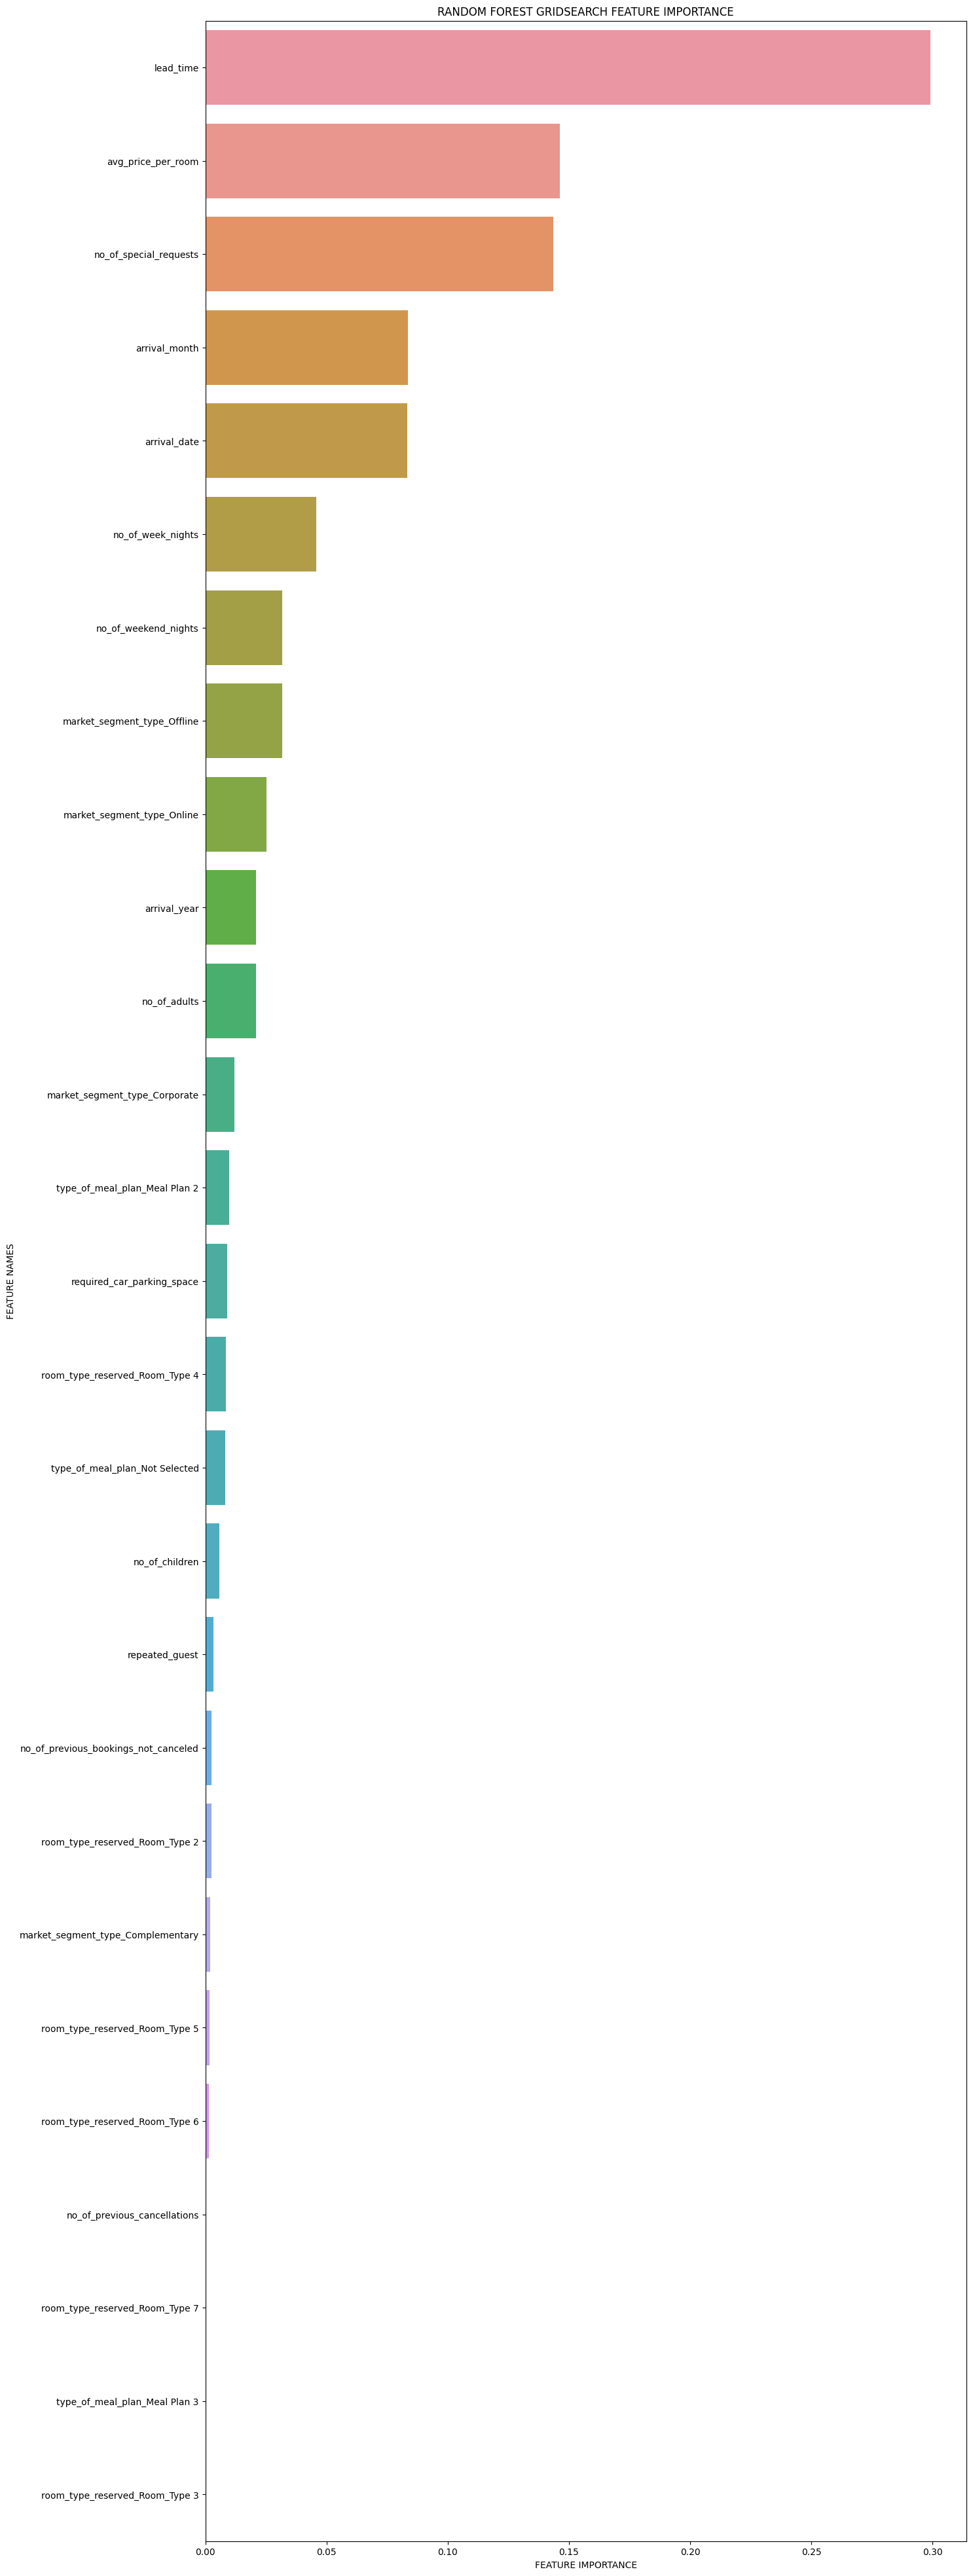

In [67]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [68]:
rfcv_accuracy = clf.score(X_test_RF, y_test)
rfcv_accuracy

0.9243542435424354

In [69]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

0.9169019766034692

In [70]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

0.9330870279146142

In [80]:
from catboost import CatBoostClassifier

grid = {'max_depth': [3,4,5,6,7,8],'n_estimators':[100, 200, 300,500,1000]}


catb = CatBoostClassifier(random_state=12)

clf = GridSearchCV(catb, param_grid=grid,scoring='accuracy',verbose=10,cv=5)
clf.fit(X_train_RF, y_train)

#returns the estimator with the best performance
print(clf.best_estimator_)

#returns the best score
print(clf.best_score_)

#returns the best parameters
print(clf.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START max_depth=3, n_estimators=100..............................
Learning rate set to 0.369872
0:	learn: 0.5643187	total: 7.11ms	remaining: 703ms
1:	learn: 0.5147360	total: 11.4ms	remaining: 557ms
2:	learn: 0.4838898	total: 17.1ms	remaining: 552ms
3:	learn: 0.4624181	total: 22.1ms	remaining: 530ms
4:	learn: 0.4519021	total: 28.4ms	remaining: 540ms
5:	learn: 0.4378600	total: 33.7ms	remaining: 527ms
6:	learn: 0.4305633	total: 39ms	remaining: 518ms
7:	learn: 0.4174629	total: 47.4ms	remaining: 545ms
8:	learn: 0.4112198	total: 56.2ms	remaining: 568ms
9:	learn: 0.4040485	total: 63.6ms	remaining: 572ms
10:	learn: 0.4001981	total: 72.2ms	remaining: 584ms
11:	learn: 0.3974048	total: 80.3ms	remaining: 589ms
12:	learn: 0.3936246	total: 87.9ms	remaining: 588ms
13:	learn: 0.3891592	total: 93.9ms	remaining: 577ms
14:	learn: 0.3872260	total: 99.6ms	remaining: 564ms
15:	learn: 0.3821236	total: 105ms	remaining: 551ms
16:	lear

In [81]:
print('Training set score: {:.4f}'.format(clf.best_estimator_.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.best_estimator_.score(X_test_RF, y_test)))

Training set score: 0.9449
Test set score: 0.9134


XGBoost

In [84]:
from xgboost import XGBClassifier

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'n_estimators': 100,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}

xgb_c = XGBClassifier(random_state=12)

clf_c = GridSearchCV(xgb_c, param_grid=params,verbose=10,cv=5)
clf.fit(X_train_RF, y_train)

print("Best Estimators: ",clf.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START max_depth=3, n_estimators=100..............................
Learning rate set to 0.369872
0:	learn: 0.5643187	total: 6.06ms	remaining: 600ms
1:	learn: 0.5147360	total: 11ms	remaining: 539ms
2:	learn: 0.4838898	total: 16.1ms	remaining: 519ms
3:	learn: 0.4624181	total: 21.3ms	remaining: 511ms
4:	learn: 0.4519021	total: 27.3ms	remaining: 518ms
5:	learn: 0.4378600	total: 32.6ms	remaining: 510ms
6:	learn: 0.4305633	total: 39ms	remaining: 518ms
7:	learn: 0.4174629	total: 45.8ms	remaining: 527ms
8:	learn: 0.4112198	total: 53.3ms	remaining: 539ms
9:	learn: 0.4040485	total: 59.1ms	remaining: 532ms
10:	learn: 0.4001981	total: 64.9ms	remaining: 525ms
11:	learn: 0.3974048	total: 69.1ms	remaining: 507ms
12:	learn: 0.3936246	total: 74.3ms	remaining: 497ms
13:	learn: 0.3891592	total: 79.2ms	remaining: 487ms
14:	learn: 0.3872260	total: 84.6ms	remaining: 479ms
15:	learn: 0.3821236	total: 89.7ms	remaining: 471ms
16:	learn

KeyboardInterrupt: 